## Project Introduction: Analyzing Student Results

Welcome to the Student Result Analysis project! In this analysis, I will explore and dissect student performance 
data to gain insights into various aspects of student achievement. This project aims to uncover patterns, trends, and
factors that influence student outcomes.

Greetings! As an aspiring Data Analyst, I have embarked on this Student Result Analysis project to
showcase my growing expertise in data analysis. This project serves as both a learning journey and
a testament to my commitment to transitioning into the field of data analysis.

## Project Objectives

The primary objectives of this analysis are:
- To understand the distribution of student scores across subjects and grade levels.
- To identify any correlations or relationships between student's various factors and academic performance.
- To discover factors that may affect student success, such as study habits or extracurricular activities etc.
- To offer actionable recommendations for improving educational outcomes based on data-driven insights.

## Data Sources

The data was sourced from Kaggle, and efforts have been made to ensure data integrity and accuracy throughout the analysis.



## What to Expect

Throughout this project, I will leverage my budding data analysis skills to explore the multifaceted world of student results. My approach will encompass data visualization, statistical analyses, and insightful narratives, all designed to extract actionable conclusions from the data.

Each section of this analysis will feature clear explanations, transparent methodologies, and succinct commentaries. My overarching goal is to not only uncover key findings but also to demonstrate my ability to communicate complex data concepts effectively.

As an aspiring Data Analyst, I'm excited to showcase my skills in data handling, analysis, and interpretation. I believe that this project not only highlights my analytical capabilities but also illustrates my passion for leveraging data to drive informed decisions.

Let's begin our exploration of student results!


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\SoumyaDas\Desktop.\result2.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


##### Let's find out the data type of the column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


##### How many null values are there in the data?

In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

##### Drop unnamed coloumn

In [9]:
df=df.drop("Unnamed: 0",axis=1)

In [10]:
df.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


##### Change weekly study hours

In [11]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("5-Oct","5-10")
df.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


##### Gender Distribution

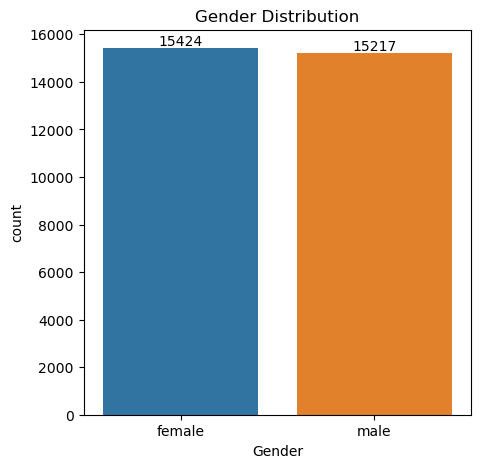

In [27]:
plt.figure(figsize=(5,5))
plt.title("Gender Distribution")
s=sns.countplot(data=df,x="Gender")
s.bar_label(s.containers[0])
plt.show()

##### From the above chart we have analysed that the number of females are more than the number of males.


In [21]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


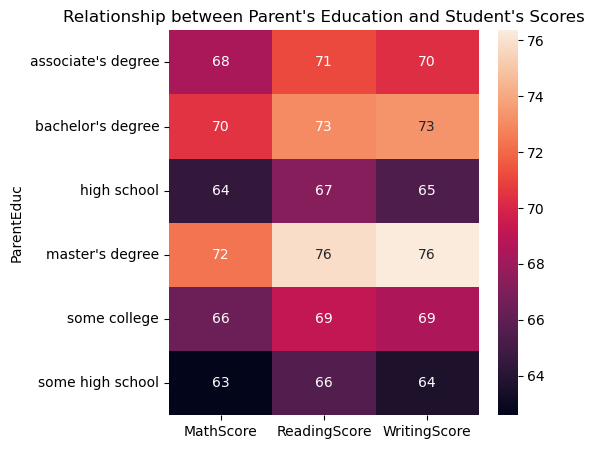

In [28]:
plt.figure(figsize=(5,5))
plt.title("Relationship between Parent's Education and Student's Scores")
sns.heatmap(gb,annot=True)
plt.show()

##### from the above chart we have analysed that the parent's education have good impact on student's scores

In [25]:
gm=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gm)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


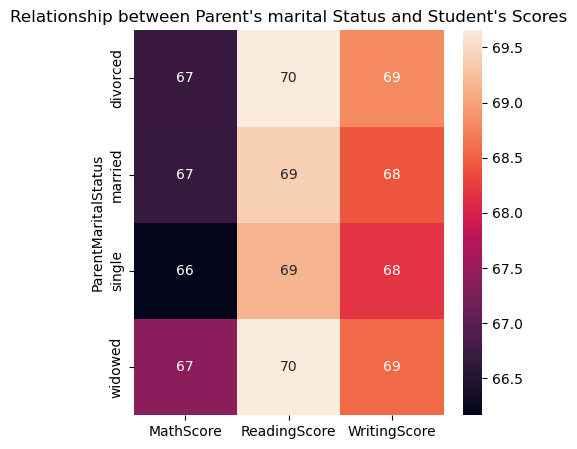

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(gm,annot=True)
plt.title("Relationship between Parent's marital Status and Student's Scores")
plt.show()

In [ ]:
#from the above chart we have concluded that the parent's marital status has no/negligible  impact on student score

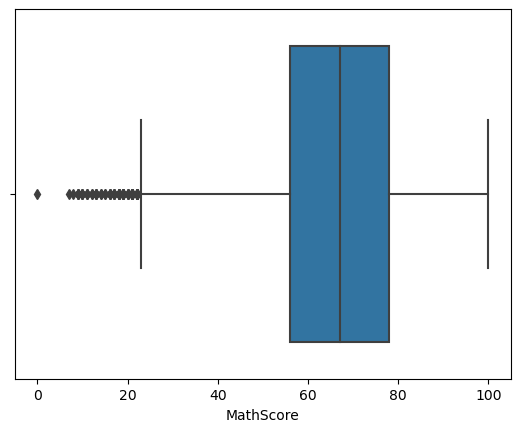

In [30]:
sns.boxplot(data=df,x="MathScore")
plt.show()

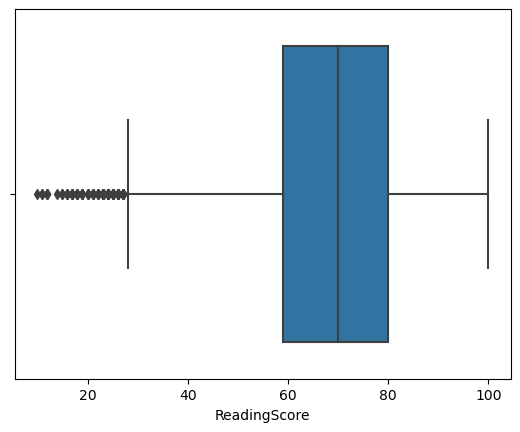

In [31]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

In [32]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


##### Distribution of Ethinic Group

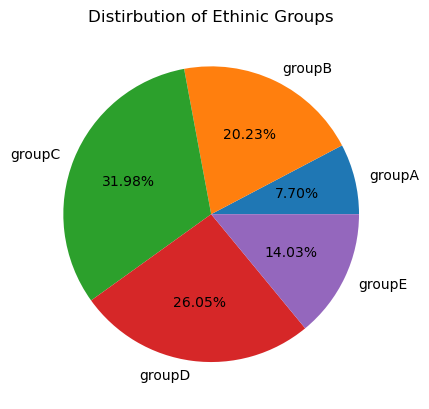

In [39]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count()
groupB=df.loc[(df["EthnicGroup"]=="group B")].count()
groupC=df.loc[(df["EthnicGroup"]=="group C")].count()
groupD=df.loc[(df["EthnicGroup"]=="group D")].count()
groupE=df.loc[(df["EthnicGroup"]=="group E")].count()


l=["groupA","groupB","groupC","groupD","groupE"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distirbution of Ethinic Groups")
plt.show()


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

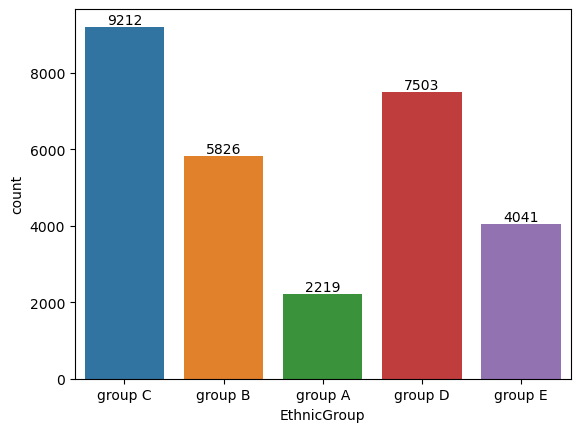

In [41]:
ap=sns.countplot(data=df,x="EthnicGroup")
ap.bar_label(ap.containers[0])

In [42]:
Wsh=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(Wsh)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778
